In [170]:
# Dependencies and Setup
import os
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress


In [171]:
# Set file path for data 
csv_path = "CleanDataset/clean_data.csv"

# Read the data 
clean_data = pd.read_csv(csv_path)

# Display the data table for preview
clean_data.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,2019-03-01 04:17:00,3,0,10,10,9,10,7,3,2,...,8,0,2,1,6,3,10,Less than 20,Female,699.1
1,2019-03-02 22:26:00,2,3,7,7,1,5,4,0,2,...,7,4,0,2,10,1,4,51 or more,Female,636.3
2,2019-03-03 03:06:00,5,2,5,3,4,3,4,0,1,...,3,0,3,2,5,5,10,36 to 50,Female,676.5
3,2019-03-03 12:20:00,1,5,6,5,10,4,2,4,1,...,6,6,2,1,6,1,7,36 to 50,Female,631.4
4,2019-03-04 00:48:00,2,4,10,3,3,1,1,4,1,...,9,10,2,1,1,1,5,21 to 35,Female,600.8


In [172]:
# Create new dataframe to only include the desired columns
support_df = clean_data[["Timestamp", "SUPPORTING_OTHERS", "AGE", "GENDER", "WORK_LIFE_BALANCE_SCORE"]]

# Rename column(s) for readability
support_df = support_df.rename(columns={"SUPPORTING_OTHERS": "# People Supported", 
                                        "AGE": "Age", 
                                        "GENDER": "Gender", 
                                        "WORK_LIFE_BALANCE_SCORE": "Work-Life Balance Score"})

# Display
support_df


,Timestamp,# People Supported,Age,Gender,Work-Life Balance Score
0,2019-03-01 04:17:00,9,Less than 20,Female,699.1
1,2019-03-02 22:26:00,1,51 or more,Female,636.3
2,2019-03-03 03:06:00,4,36 to 50,Female,676.5
3,2019-03-03 12:20:00,10,36 to 50,Female,631.4
4,2019-03-04 00:48:00,3,21 to 35,Female,600.8
...,...,...,...,...,...
5543,2021-03-14 05:42:00,0,51 or more,Female,644.5
5544,2021-03-14 06:30:00,7,21 to 35,Female,714.9
5545,2021-03-14 08:35:00,10,21 to 35,Male,716.6
5546,2021-03-14 08:43:00,2,21 to 35,Female,682.0


## Average Work-Life Balance Score for # of People Supported

* Generate a line plot showing the average work-life balance score for each # of people supported

In [173]:
# Group by # of people supported 
groupedby_support = support_df.groupby(["# People Supported"])

# Get average score for each # of people supported
avg_score = groupedby_support["Work-Life Balance Score"].mean()

# Create new dataframe
support_score_summary = pd.DataFrame({"Average Score": avg_score})

# Display
support_score_summary

,Average Score
# People Supported,
0,616.320721
1,623.844981
2,636.117857
3,651.246044
4,656.227431
5,664.567286
6,670.826799
7,676.976011
8,682.064972


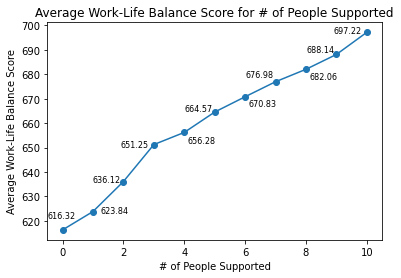

In [174]:
# Create line plot
plt.plot(support_score_summary, marker="o")

# Add labels
plt.title(f"Average Work-Life Balance Score for # of People Supported")
plt.xlabel("# of People Supported")
plt.ylabel("Average Work-Life Balance Score")

# Annotate markers
plt.annotate('616.32', xy=(0, 616), xytext=(-0.5, 621), fontsize=8)
plt.annotate('623.84', xy=(1, 620), xytext=(1.25, 623), fontsize=8)
plt.annotate('636.12', xy=(2, 630), xytext=(1, 636), fontsize=8)
plt.annotate('651.25', xy=(3, 650), xytext=(1.9, 650), fontsize=8)
plt.annotate('656.28', xy=(4, 650), xytext=(4.1, 652), fontsize=8)
plt.annotate('664.57', xy=(5, 660), xytext=(4, 665), fontsize=8)
plt.annotate('670.83', xy=(6, 670), xytext=(6.1, 667), fontsize=8)
plt.annotate('676.98', xy=(7, 675), xytext=(6, 679), fontsize=8)
plt.annotate('682.06', xy=(8, 682), xytext=(8.1, 678), fontsize=8)
plt.annotate('688.14', xy=(9, 688), xytext=(8, 689), fontsize=8)
plt.annotate('697.22', xy=(10, 697), xytext=(8.9, 697), fontsize=8)

# Save the figure
plt.savefig("output_data/support_fig1.png")

# Display
plt.show()

## 10 People Supported Breakdown
* The highest average work-life balance score came from surveyees who reported supporting 10 (or more people). 
* Focusing on the 10 People Supported group, create a box plot showing the distribution of scores for each age group, highlighting any potential score outliers.

In [175]:
# Create a new DataFrame containing only rows where the # of People Supported is 10
ten_support_df = support_df[support_df["# People Supported"] == 10]

# Display
ten_support_df

,Timestamp,# People Supported,Age,Gender,Work-Life Balance Score
3,2019-03-03 12:20:00,10,36 to 50,Female,631.4
9,2019-03-04 14:17:00,10,51 or more,Female,693.8
20,2019-03-08 04:41:00,10,36 to 50,Female,744.6
21,2019-03-08 12:31:00,10,36 to 50,Female,593.8
25,2019-03-10 04:54:00,10,36 to 50,Female,629.3
...,...,...,...,...,...
5537,2021-03-13 10:06:00,10,51 or more,Female,622.9
5539,2021-03-13 13:27:00,10,21 to 35,Female,685.6
5540,2021-03-13 19:15:00,10,51 or more,Male,689.0
5545,2021-03-14 08:35:00,10,21 to 35,Male,716.6


In [176]:
# Put age groups into a list for a for loop
ages = ["21 to 35", "36 to 50", "51 or more", "Less than 20"]

# Craete empty list to fill with work-life balance score data
work_life_score = []

# Locate rows for each age group and get the work-life balance scores
for age in ages:
    age_group = ten_support_df.loc[ten_support_df["Age"] == age]
    score = age_group["Work-Life Balance Score"]
    
    # Add values to list
    work_life_score.append(score)
    
    # Calculate the IQR and quantitatively 
    quartiles = score.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Check for outliers
    outliers = score.loc[(score < lower_bound) | (score > upper_bound)]
    
    # Print results
    print(f"\n{age}")
    print(f"Lower Quartile: {lowerq}")
    print(f"Upper Quartile: {upperq}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Outlier Count: {outliers.count()}")
    # Print the outlier value if it exists
    if outliers.count() > 0:
        for i in outliers.index:
            print(f"Work-Life Balance Score Outlier Value: {outliers[i]}")
    
    


21 to 35
Lower Quartile: 671.5
Upper Quartile: 717.6
IQR: 46.10000000000002
Lower Bound: 602.3499999999999
Upper Bound: 786.75
Outlier Count: 6
Work-Life Balance Score Outlier Value: 563.2
Work-Life Balance Score Outlier Value: 787.5
Work-Life Balance Score Outlier Value: 790.9
Work-Life Balance Score Outlier Value: 601.3
Work-Life Balance Score Outlier Value: 591.5
Work-Life Balance Score Outlier Value: 568.1

36 to 50
Lower Quartile: 666.0
Upper Quartile: 720.6500000000001
IQR: 54.65000000000009
Lower Bound: 584.0249999999999
Upper Bound: 802.6250000000002
Outlier Count: 2
Work-Life Balance Score Outlier Value: 579.5
Work-Life Balance Score Outlier Value: 583.0

51 or more
Lower Quartile: 680.8
Upper Quartile: 732.7
IQR: 51.90000000000009
Lower Bound: 602.9499999999998
Upper Bound: 810.5500000000002
Outlier Count: 2
Work-Life Balance Score Outlier Value: 594.2
Work-Life Balance Score Outlier Value: 814.5

Less than 20
Lower Quartile: 686.775
Upper Quartile: 722.875
IQR: 36.100000000

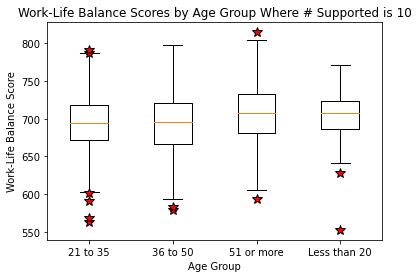

In [177]:
# Generate a box plot of the work-life balance scores across the different surveyee age groups
fig1, age_plot = plt.subplots()
age_plot.boxplot(work_life_score, labels=ages, flierprops={'markerfacecolor': 'r', 'markersize':10,'marker': '*'})

# Set labels
age_plot.set_title("Work-Life Balance Scores by Age Group Where # Supported is 10")
age_plot.set_xlabel("Age Group")
age_plot.set_ylabel("Work-Life Balance Score")

# Save the figure
plt.savefig("output_data/support_fig2.png")

# Display
plt.show()